<a href="https://colab.research.google.com/github/techhorse/DeepLearning-using-FastAi/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np;



In [0]:
import torch;

In [0]:
import helper;

In [0]:
import matplotlib.pyplot as plt;

In [0]:
from torchvision import datasets,transforms;

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

In [0]:
trainset = datasets.MNIST('MNIST_data/',download = True,train = True,transform = transform);

In [0]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True);

In [0]:
dataiter = iter(trainloader);

In [0]:
images,labels = dataiter.next();

In [0]:
print(type(images));

<class 'torch.Tensor'>


In [0]:
print(images.shape);

torch.Size([64, 1, 28, 28])


In [0]:
print(labels.shape);

torch.Size([64])


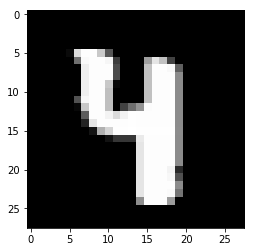

In [0]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

In [0]:
from fastai import *;
from fastai.vision import *;

In [0]:
folder = 'black';
file = 'urls_black.txt';

In [0]:
folder = 'grizzly';
file = 'urls_grizzly.txt';

In [0]:
folder = 'teddys';
file = 'urls_teddys.txt';

In [0]:
path = Path('data/bears');

In [0]:
dest = path/folder

In [0]:
  dest.mkdir(parents = True,exist_ok=True);

In [0]:
classes = ['teddys','grizzly','black']


In [0]:
download_images(dest/file, dest, max_pics=200);

In [0]:
for c in classes:
  print(c)
  verify_images(path/c,delete=True,max_workers=8)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [44]:
data.classes


['black', 'grizzly', 'teddys']

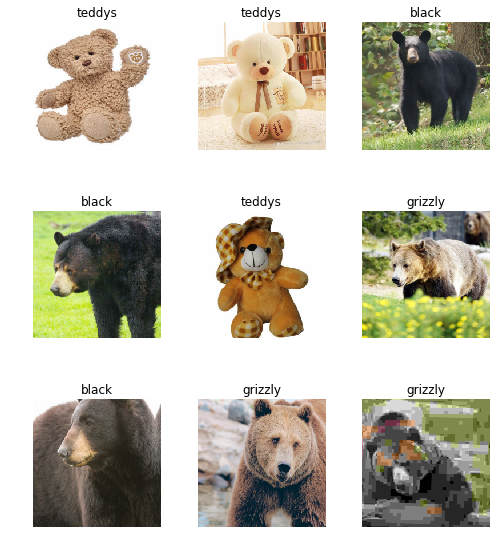

In [45]:
data.show_batch(rows=3, figsize=(7,8))

In [46]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 223, 55)

In [47]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 140861934.84it/s]


In [48]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.322489,0.386130,0.090909,01:24
1,0.753469,0.059867,0.000000,01:27
2,0.520223,0.040175,0.018182,01:28
3,0.396480,0.036858,0.018182,01:27


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


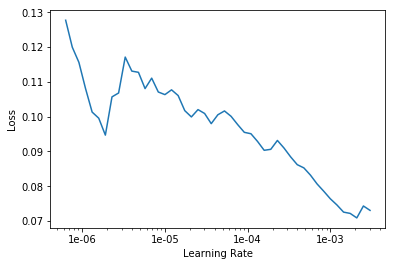

In [52]:
learn.recorder.plot()

In [53]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.118966,0.053538,0.018182,02:02
1,0.103692,0.055322,0.018182,01:58


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

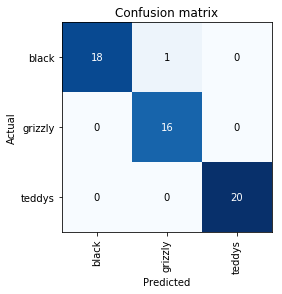

In [57]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [66]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Train)
fd = ImageDeleter(ds,idxs)

NameError: ignored

In [0]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')


In [69]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

NameError: ignored

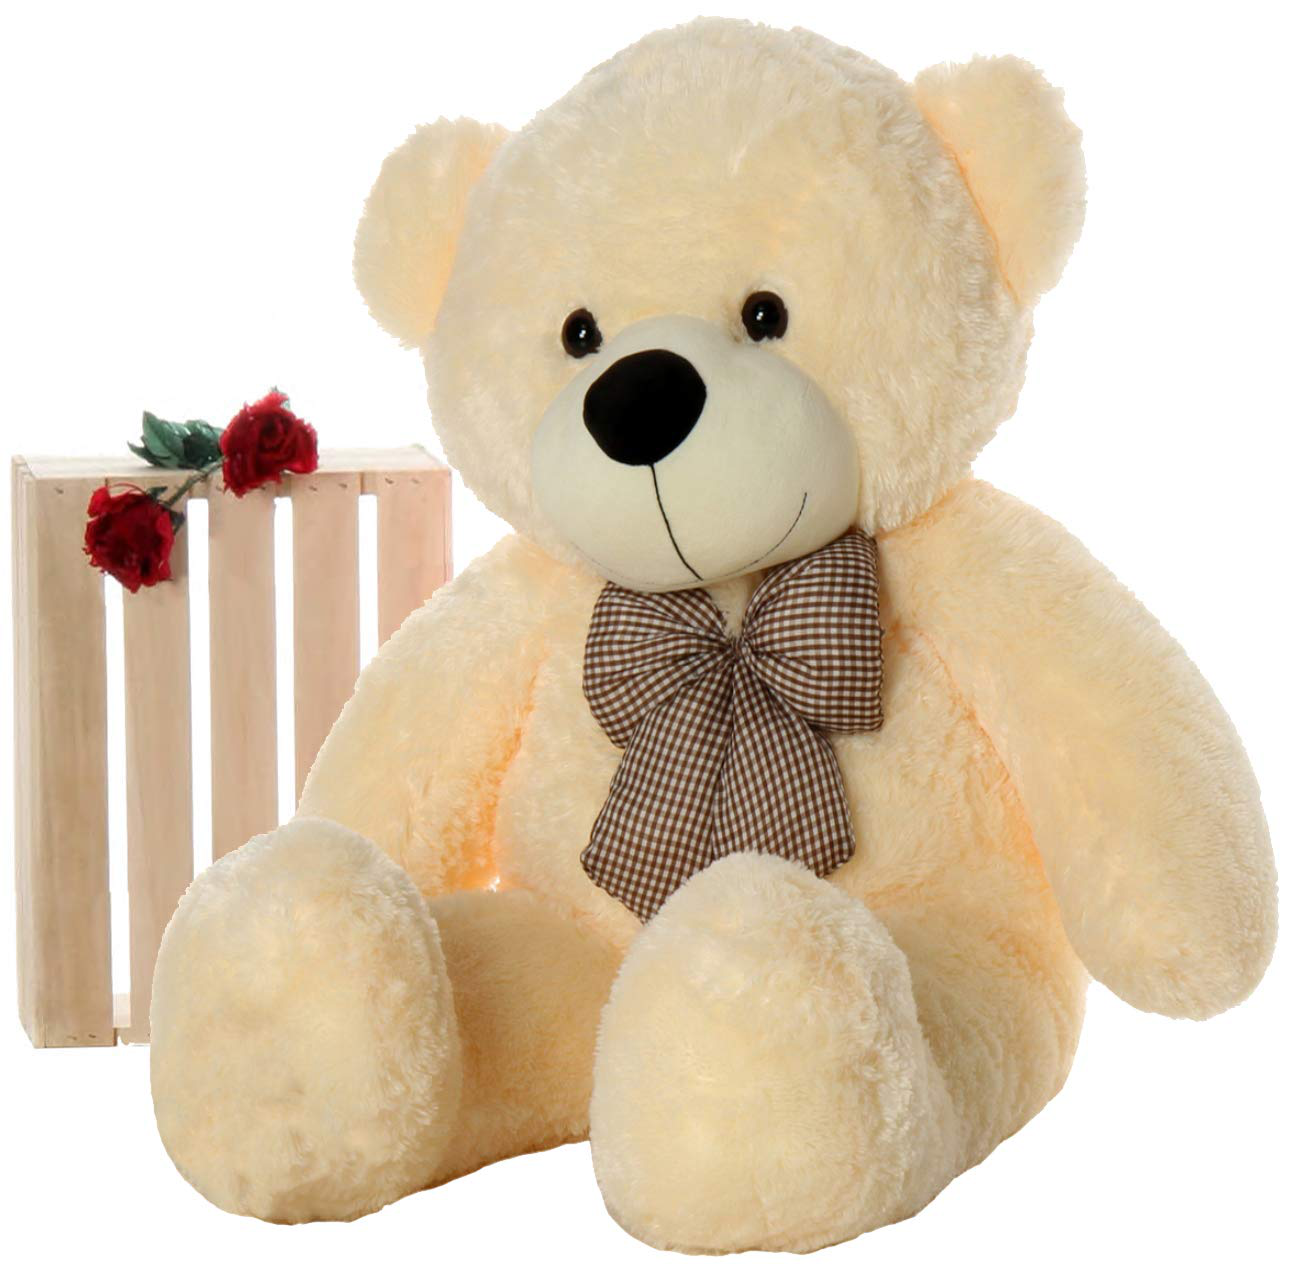

In [73]:
img = open_image(path/'teddys'/'00000021.jpg')
img

In [74]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys